In [1]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import gzip

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')
  
df = getDF('reviews_Baby_5.json.gz')

In [3]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [4]:
data = df.drop(['reviewerID', 'reviewerName', 'helpful', 'reviewTime', 'unixReviewTime'], axis=1)

In [5]:
data.shape

(160792, 4)

In [6]:
data.isnull().sum()

asin          0
reviewText    0
overall       0
summary       0
dtype: int64

In [7]:
data['asin'].nunique()

7050

In [8]:
data.dtypes

asin           object
reviewText     object
overall       float64
summary        object
dtype: object

In [9]:
data['overall'] = df['overall'].astype(int)

In [10]:
data.head()

,asin,reviewText,overall,summary
0,097293751X,Perfect for new parents. We were able to keep ...,5,Awesine
1,097293751X,This book is such a life saver. It has been s...,5,Should be required for all new parents!
2,097293751X,Helps me know exactly how my babies day has go...,5,Grandmother watching baby
3,097293751X,I bought this a few times for my older son and...,5,repeat buyer
4,097293751X,I wanted an alternative to printing out daily ...,4,Great


In [11]:
data.isnull().sum()

asin          0
reviewText    0
overall       0
summary       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160792 entries, 0 to 160791
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   asin        160792 non-null  object
 1   reviewText  160792 non-null  object
 2   overall     160792 non-null  int32 
 3   summary     160792 non-null  object
dtypes: int32(1), object(3)
memory usage: 5.5+ MB


In [13]:
data['overall'].unique()

array([5, 4, 3, 1, 2])

In [14]:
data.describe()

,overall
count,160792.000000
mean,4.214115
std,1.144325
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


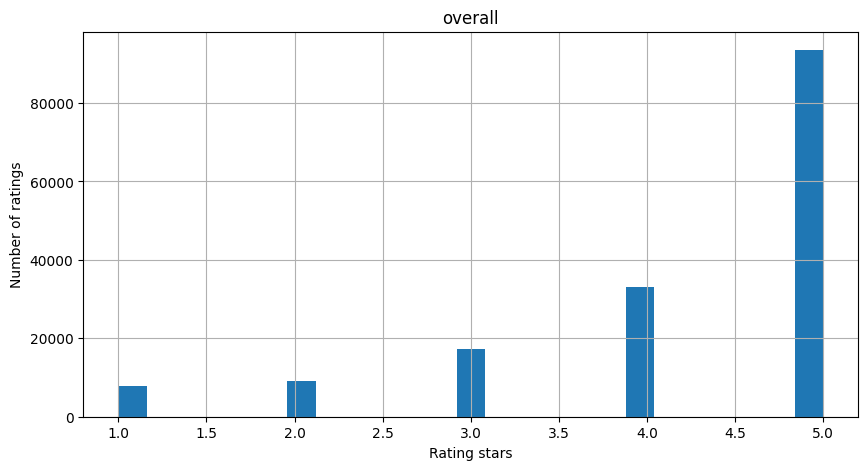

In [28]:
data.hist(bins=25, figsize=(10,5))

#giving X and Y labels
plt.xlabel("Rating stars")
plt.ylabel("Number of ratings")

plt.show()

In [76]:
df2 = df.groupby('asin')['asin'].value_counts()
df2 = df2.to_frame()
df2

,,asin
asin,asin,
097293751X,097293751X,17
9729375011,9729375011,35
B00000IZQI,B00000IZQI,12
B00000J3LL,B00000J3LL,8
B00002JV9S,B00002JV9S,58
...,...,...
B00JEV5UI8,B00JEV5UI8,5
B00JLHWDO4,B00JLHWDO4,11
B00JLI73ZM,B00JLI73ZM,6


[Text(0.5, 0, 'Product ID'), Text(0, 0.5, 'No. of reviews(log scale')]

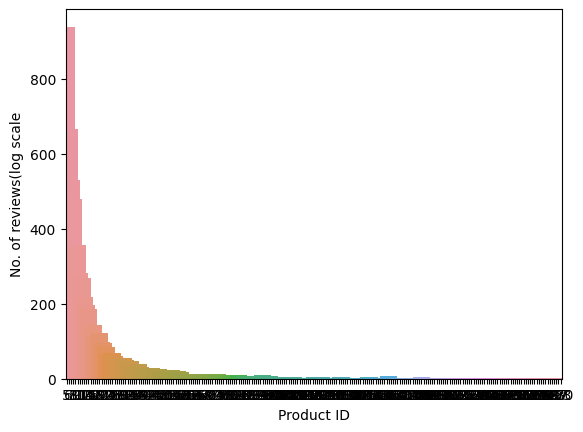

In [112]:
p = sns.countplot(data = df2, x='asin', width=8)
p.set(xlabel='Product ID', ylabel='No. of reviews(log scale')

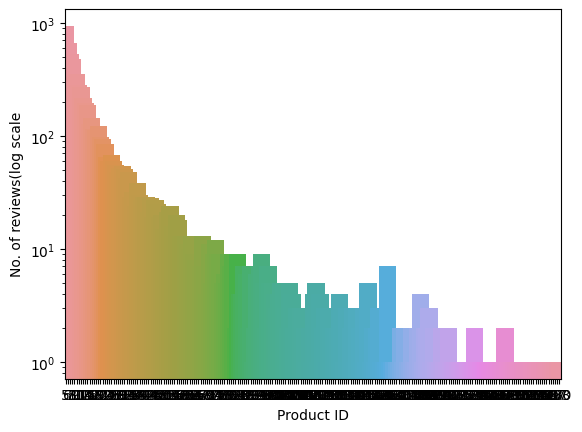

In [111]:
p = sns.countplot(data = df2, x='asin', width=8)
p.set(xlabel='Product ID', ylabel='No. of reviews(log scale')
p.set_yscale("log")

In [17]:
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)

Num GPUs Available:  1


In [26]:
data["sentiment"] = data['overall'].apply(lambda score: "positive" if score > 3 else ("negative" if score < 3 else "neutral"))

In [27]:
data

,asin,reviewText,overall,summary,sentiment
0,097293751X,Perfect for new parents. We were able to keep ...,5,Awesine,positive
1,097293751X,This book is such a life saver. It has been s...,5,Should be required for all new parents!,positive
2,097293751X,Helps me know exactly how my babies day has go...,5,Grandmother watching baby,positive
3,097293751X,I bought this a few times for my older son and...,5,repeat buyer,positive
4,097293751X,I wanted an alternative to printing out daily ...,4,Great,positive
...,...,...,...,...,...
160787,B00L13XFIE,Bought this as a baby gift and my friend heard...,5,Great baby gift,positive
160788,B00L13XFIE,I am new to cloth diapering. I was leery that ...,4,Not too bulky,positive
160789,B00L13XFIE,My friend is planning on cloth diapering and I...,5,great help!,positive
160790,B00L13XFIE,We LOVE the organic cotton/hemp inserts. They'...,5,Love these diapers!,positive


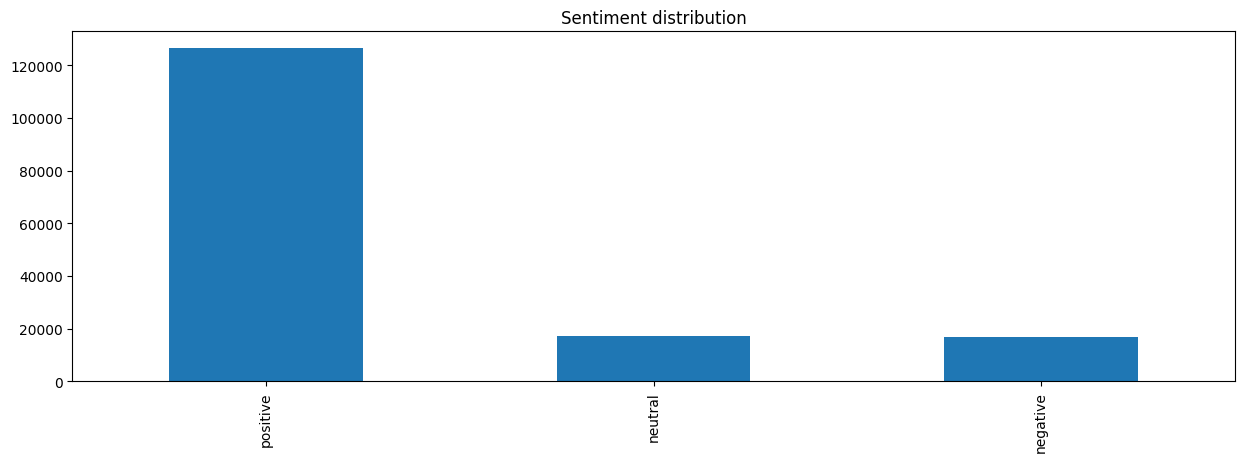

In [39]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
data["sentiment"].value_counts().plot(kind="bar", ax=ax1, title="Sentiment distribution")
plt.show()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["overall"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["overall"] = dataAfter["overall"].astype(int)

Before 160792
After 160792


In [46]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["overall"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [47]:
len(strat_train)

128633

In [48]:
strat_train["overall"].value_counts()/len(strat_train)

5    0.581663
4    0.205227
3    0.107313
2    0.057170
1    0.048627
Name: overall, dtype: float64

In [49]:
len(strat_test)

32159

In [50]:
strat_test["overall"].value_counts()/len(strat_test)

5    0.581641
4    0.205230
3    0.107311
2    0.057185
1    0.048633
Name: overall, dtype: float64

In [51]:
reviews = strat_train.copy()
reviews.head(2)

,asin,reviewText,overall,summary,sentiment
7403,B00008KWO1,Purchased for my granddaughter to keep her war...,5,Very nice.,positive
8682,B0000D9SRG,I found that when the shower motor stops just ...,4,Shower works fine for me!,positive


In [53]:
len(reviews["asin"].unique()) 

7050

In [116]:
counts = reviews["asin"].value_counts().to_frame()
counts.head()

,asin
B000IDSLOG,627
B00295MQLU,532
B000YDDF6O,468
B0000DEW8N,392
B001U9OUYC,349


In [115]:
avg_rating = reviews.groupby("asin")["overall"].mean().to_frame()
avg_rating.head()

,overall
asin,
097293751X,4.384615
9729375011,4.851852
B00000IZQI,4.833333
B00000J3LL,4.428571
B00002JV9S,4.180000


In [118]:
table = counts.join(avg_rating)
table.head()

,asin,overall
B000IDSLOG,627,4.304625
B00295MQLU,532,4.637218
B000YDDF6O,468,4.717949
B0000DEW8N,392,4.698980
B001U9OUYC,349,4.590258


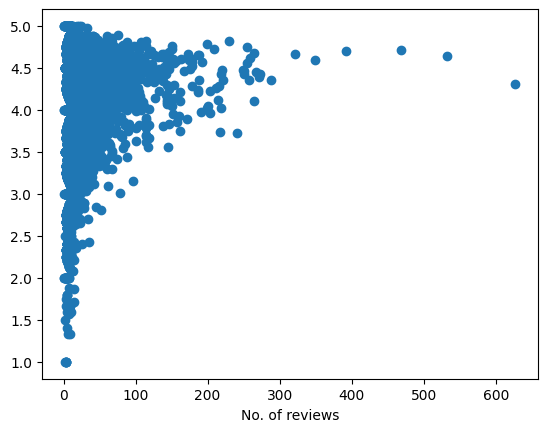

,asin,overall
asin,1.000000,0.091648
overall,0.091648,1.000000


In [122]:
plt.scatter("asin", "overall", data=table)
plt.xlabel("Rating")
plt.xlabel("No. of reviews")
plt.show()
table.corr()